# Week4授業課題
## 信用情報の学習
Kaggleの Home Credit Default Risk コンペティションの学習および推定を行います。

# 【問題1】
## コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

- 何を学習し、何を予測するのか
- どのようなファイルを作りKaggleに提出するか
- 提出されたものはどういった指標値で評価されるのか

## 何を学習し、何を予測するのか
ローンの情報(車を持ってるか、不動産を持ってるか、学歴など)を

クライアントのローンの返済能力を予測する

## どのようなファイルを作りKaggleに提出するか
(TARGETは予測結果(%))

下記のような形式(csvファイル)
```
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

## 提出されたものはどういった指標値で評価されるのか
ROC曲線を用いて評価される

まずは単純な方法による **ベースラインモデル** を作成します。精度の基準となるモデルです。

精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。

# 【問題2】
## 学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
display(df_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
display(df_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
from sklearn.model_selection import train_test_split

df_train_dropna = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].dropna(how='any')

X = df_train_dropna[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].values
y = df_train_dropna['TARGET'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(82191, 3) (27398, 3) (82191,) (27398,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

print(np.mean(X_train_std[:, 0]), np.var(X_train_std[:, 0]))
print(np.mean(X_train_std[:, 1]), np.var(X_train_std[:, 1]))
print(np.mean(X_train_std[:, 2]), np.var(X_train_std[:, 2]))

-1.2085044605537824e-14 1.0000000000000109
-1.1504056120706668e-14 0.9999999999999982
1.0388435902815591e-13 0.9999999999999026


In [6]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
y_train_pred = rforest.predict_proba(X_train_std)
print(y_train_pred.shape, y_train_pred)
print(y_train.shape, y_train)

(82191, 2) [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.23 0.77]
 [0.99 0.01]
 [0.86 0.14]]
(82191,) [0 0 0 ... 1 0 0]


In [8]:
from sklearn.metrics import roc_auc_score
print(f'AUC_train: {roc_auc_score(y_train, y_train_pred[:, 1])}')

AUC_train: 1.0


In [9]:
y_val_pred = rforest.predict_proba(X_val_std)
print(f'AUC_test: {roc_auc_score(y_val, y_val_pred[:, 1])}')

AUC_test: 0.6825288113237263


# 【問題3】
## テストデータに対する推定
テストデータ（`application_test.csv`）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [10]:
df_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

SK_ID_CURR          0
EXT_SOURCE_1    20532
EXT_SOURCE_2        8
EXT_SOURCE_3     8668
dtype: int64

In [11]:
# 欠損値の0埋め
df_test_fillna = df_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].fillna(0)

# SK_ID_CURR
ids = df_test_fillna['SK_ID_CURR'].values
X_test = df_test_fillna[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].values

# 標準化
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)

# 予測
y_test_pred = rforest.predict_proba(X_test_std)

print(y_test_pred, y_test_pred.shape)
print(ids, ids.shape)

submitting = np.concatenate((ids.reshape(-1, 1), y_test_pred[:, 1].reshape(-1, 1)), axis=1)
print(submitting) 

[[0.89 0.11]
 [0.96 0.04]
 [1.   0.  ]
 ...
 [0.97 0.03]
 [1.   0.  ]
 [0.91 0.09]] (48744, 2)
[100001 100005 100013 ... 456223 456224 456250] (48744,)
[[1.00001e+05 1.10000e-01]
 [1.00005e+05 4.00000e-02]
 [1.00013e+05 0.00000e+00]
 ...
 [4.56223e+05 3.00000e-02]
 [4.56224e+05 0.00000e+00]
 [4.56250e+05 9.00000e-02]]


In [12]:
df_submitting = pd.DataFrame(submitting, columns=['SK_ID_CURR', 'TARGET'])
df_submitting['SK_ID_CURR'] = df_submitting['SK_ID_CURR'].astype(np.int64)
display(df_submitting)
df_submitting.info()

df_submitting.to_csv('test_pred.csv', index=False)

,SK_ID_CURR,TARGET
0,100001,0.11
1,100005,0.04
2,100013,0.00
3,100028,0.03
4,100038,0.17
...,...,...
48739,456221,0.01
48740,456222,0.06
48741,456223,0.03
48742,456224,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


ベースラインモデルを元に、入力する特徴量に様々な工夫を行い精度を向上させていきます。

# 【問題4】
## 特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

- どの特徴量を使うか
- どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [13]:
# application_train読み込みからやり直してみる
# 訓練データをシードを0に固定した状態で訓練セット/バリデーションセットに分割する
# train/valid/test
# 以下、ここで読み込んだデータを使用する
credits_train = pd.read_csv('application_train.csv')
credits_test = pd.read_csv('application_test.csv')

# 1. EXT_SOURCEの欠損値を平均値で埋めてみる
ただ0埋めするのはあまりよろしくないと思われるので、欠損値をそれぞれの特徴量の平均値で埋める。

また、欠損値埋めを学習データでも行う（学習時の欠損値処理≠テスト時の欠損値処理となっていた）

In [14]:
# 訓練データの分割 train and valid
X = credits_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].values
y = credits_train['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)
# 欠損値の確認
print(credits_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum())

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64


In [15]:
# 欠損値の平均値穴埋め
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

imp.fit(X_train)
X_train_filled = imp.transform(X_train)

print(X_train)
print(np.count_nonzero(np.isnan(X_train), axis=0))
print(X_train_filled)
print(np.count_nonzero(np.isnan(X_train_filled), axis=0))

[[       nan 0.57998394        nan]
 [0.75176593 0.70006699 0.69866756]
 [       nan 0.5940209  0.76233562]
 ...
 [       nan 0.65133611 0.61782615]
 [       nan 0.4280359  0.03140464]
 [       nan 0.59264375 0.58499004]]
[130116    508  45736]
[[0.50219428 0.57998394 0.51070081]
 [0.75176593 0.70006699 0.69866756]
 [0.50219428 0.5940209  0.76233562]
 ...
 [0.50219428 0.65133611 0.61782615]
 [0.50219428 0.4280359  0.03140464]
 [0.50219428 0.59264375 0.58499004]]
[0 0 0]


In [16]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train_filled)
X_train_new = scaler.transform(X_train_filled)

print(X_train_filled)
print(np.mean(X_train_filled, axis=0), np.var(X_train_filled, axis=0))
print(X_train_new)
print(np.mean(X_train_new, axis=0), np.var(X_train_new, axis=0))

[[0.50219428 0.57998394 0.51070081]
 [0.75176593 0.70006699 0.69866756]
 [0.50219428 0.5940209  0.76233562]
 ...
 [0.50219428 0.65133611 0.61782615]
 [0.50219428 0.4280359  0.03140464]
 [0.50219428 0.59264375 0.58499004]]
[0.50219428 0.51423338 0.51070081] [0.01938326 0.03640297 0.03048774]
[[ 7.39942474e-12  3.44612498e-01 -2.71312791e-12]
 [ 1.79259343e+00  9.73993038e-01  1.07651084e+00]
 [ 7.39942474e-12  4.18183155e-01  1.44114641e+00]
 ...
 [ 7.39942474e-12  7.18584264e-01  6.13521205e-01]
 [ 7.39942474e-12 -4.51779066e-01 -2.74499377e+00]
 [ 7.39942474e-12  4.10965266e-01  4.25464402e-01]]
[ 7.39445152e-12 -4.08835591e-14 -2.81577459e-12] [1. 1. 1.]


In [17]:
# ランダムフォレストで学習・予測
rforest = RandomForestClassifier()
rforest.fit(X_train_new, y_train)
y_train_pred = rforest.predict_proba(X_train_new)
print(y_train_pred)

[[1.   0.  ]
 [1.   0.  ]
 [0.8  0.2 ]
 ...
 [1.   0.  ]
 [0.35 0.65]
 [1.   0.  ]]


In [18]:
# AUCスコア
print(f'AUC- train: {roc_auc_score(y_train, y_train_pred[:, 1])}')

AUC- train: 0.9995687817891254


In [19]:
# validation加工
X_valid_new = scaler.transform(imp.transform(X_valid))
print(X_valid_new)
print(np.count_nonzero(np.isnan(X_valid_new), axis=0))
print(np.mean(X_valid_new, axis=0), np.var(X_valid_new, axis=0))

[[ 1.28781922e+00  2.66217475e-01  9.79369028e-01]
 [ 7.39942474e-12  9.79882776e-01 -1.16240284e+00]
 [ 4.85328889e-01  5.60742582e-02 -2.71312791e-12]
 ...
 [ 2.48850532e+00  9.65919274e-01  4.55493477e-01]
 [ 9.83992946e-01  8.70476179e-01 -5.36066372e-01]
 [ 7.39942474e-12 -2.62860409e-01  1.41856686e+00]]
[0 0 0]
[-0.00080805  0.00333247  0.00279343] [1.00982974 1.00246884 0.99342419]


In [20]:
# バリデーションセットに対して予測
y_valid_pred = rforest.predict_proba(X_valid_new)
# AUC
print(f'AUC - valid: {roc_auc_score(y_valid, y_valid_pred[:, 1])}')

AUC - valid: 0.6332824298821002


In [21]:
# testデータに対して予測
X_test = credits_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].values
X_test_new = scaler.transform(imp.transform(X_test[:, 1:]))

y_test_pred = rforest.predict_proba(X_test_new)[:, 1]

df_pred = pd.DataFrame(np.concatenate((X_test[:, 0].reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1),
            columns=['SK_ID_CURR', 'TARGET'])
df_pred['SK_ID_CURR'] = df_pred['SK_ID_CURR'].astype(np.int32)

df_pred.to_csv('test_pred_1.csv', index=False)

# AUCスコア
0.627727
# 考察
少し精度が上昇した。

EXT_SOURCE_1列の場合欠損値が多いため分布が変わっているかもしれない。

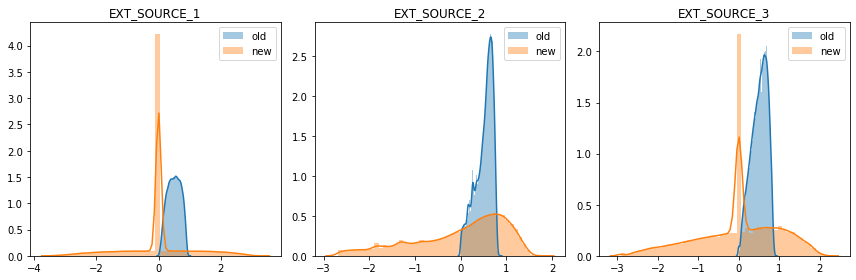

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(12, 4))

col_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, col in enumerate(col_list):
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.distplot(X_train[:, i], label="old")
    ax = sns.distplot(X_train_new[:, i], label="new")
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

明らかに平均値付近のデータが増えている。

別の方法を考える。

# 2. 元データの平均・分散に従う正規分布乱数で埋める
偏りを失くす

In [23]:
def scale_and_fill(X, scaler):
    # 標準化
    X_norm = scaler.transform(X)

    # 欠損値確認
    nan_num = np.isnan(X_norm).sum()

    # 穴埋め用乱数生成 - arr_replace
    rands = np.random.normal(0, 1, nan_num)
    arr_replace = np.zeros(X_norm.shape)
    np.place(arr_replace, np.isnan(X_norm), rands)

    # 欠損値穴埋め
    X_norm_filled = np.where(np.isnan(X_norm), arr_replace, X_norm)
    return X_norm_filled

In [24]:
print(X_train)
scaler = scaler.fit(X_train)
X_train_new = scale_and_fill(X_train, scaler)
print(X_train_new)

[[       nan 0.57998394        nan]
 [0.75176593 0.70006699 0.69866756]
 [       nan 0.5940209  0.76233562]
 ...
 [       nan 0.65133611 0.61782615]
 [       nan 0.4280359  0.03140464]
 [       nan 0.59264375 0.58499004]]
[[-0.24042522  0.34423276  2.67205691]
 [ 1.18342526  0.97291977  0.96387921]
 [-0.36421225  0.41772235  1.29036422]
 ...
 [-0.79765655  0.71779244  0.54933059]
 [ 0.71543249 -0.45128124 -2.45779452]
 [-1.3649407   0.41051241  0.38094953]]


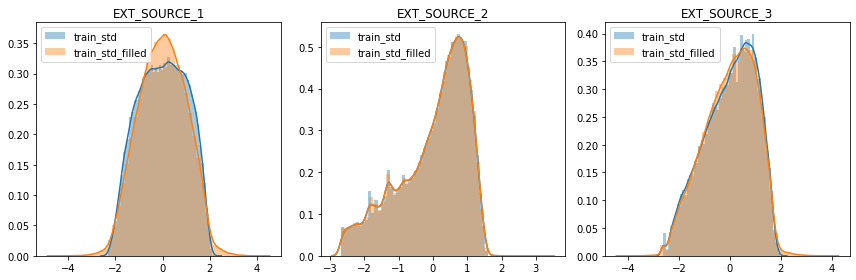

In [25]:
# プロットして分布を確認

%matplotlib inline
fig = plt.figure(figsize=(12, 4))

col_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, col in enumerate(col_list):
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.distplot(scaler.transform(X_train)[:, i], label="train_std")
    ax = sns.distplot(X_train_new[:, i], label="train_std_filled")
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

先ほどよりは差が無くなった

In [26]:
# ランダムフォレストで学習・予測
rforest = RandomForestClassifier()
rforest.fit(X_train_new, y_train)
y_train_pred = rforest.predict_proba(X_train_new)
print(y_train_pred)

[[0.98 0.02]
 [1.   0.  ]
 [0.95 0.05]
 ...
 [1.   0.  ]
 [0.1  0.9 ]
 [0.99 0.01]]


In [27]:
# AUCスコア
print(f'AUC - train: {roc_auc_score(y_train, y_train_pred[:, 1])}')

AUC - train: 1.0


In [28]:
# validation加工
X_valid_new = scale_and_fill(X_valid, scaler)
# バリデーションセットに対して予測
y_valid_pred = rforest.predict_proba(X_valid_new)
# AUC
print(f'AUC - valid: {roc_auc_score(y_valid, y_valid_pred[:, 1])}')

AUC - valid: 0.6497291646343987


In [29]:
# testデータに対して予測
X_test = credits_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].values
X_test_new = scale_and_fill(X_test[:, 1:], scaler)

y_test_pred = rforest.predict_proba(X_test_new)[:, 1]

df_pred = pd.DataFrame(np.concatenate((X_test[:, 0].reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1),
            columns=['SK_ID_CURR', 'TARGET'])
df_pred['SK_ID_CURR'] = df_pred['SK_ID_CURR'].astype(np.int32)

df_pred.to_csv('test_pred_2.csv', index=False)

# AUCスコア
0.64455
# 考察
少し精度が上昇した。

欠損値処理は良くできたが、特徴量が3列では限界があるかもしれない。

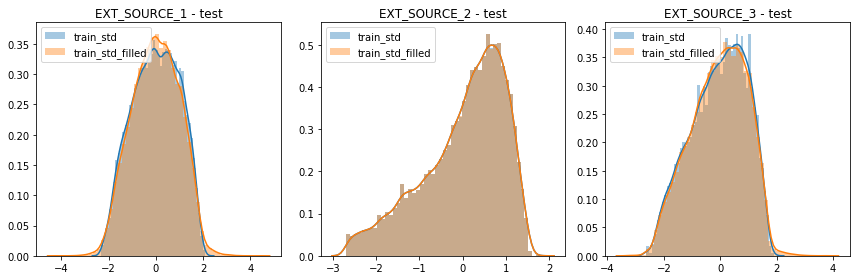

In [30]:
# プロットして分布を確認 - testデータ

%matplotlib inline
fig = plt.figure(figsize=(12, 4))

col_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, col in enumerate(col_list):
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.distplot(scaler.transform(X_test[:, 1:])[:, i], label="train_std")
    ax = sns.distplot(X_test_new[:, i], label="train_std_filled")
    ax.set_title(col+' - test')
    ax.legend()

plt.tight_layout()
plt.show()

In [31]:
# 念のため欠損値穴埋め前後で統計量がほぼ変化していない(mean=0, variance=1)ことを確認
print(np.nanmean(scaler.transform(X_train), axis=0), np.nanvar(scaler.transform(X_train), axis=0))
print(np.mean(X_train_new, axis=0), np.var(X_train_new, axis=0))

[-5.90886264e-15 -3.15751881e-14 -1.13983653e-13] [1. 1. 1.]
[ 4.72633180e-04  3.16673606e-05 -1.40953529e-03] [0.99675093 1.00004155 0.99951904]


# 3. DAYS_BIRTHを使ってみる
年齢が低いほど返済率が下がる可能性

In [32]:
# 特徴量取得
X3 = credits_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].values

X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3, y, stratify=y)

In [33]:
# 前処理
scaler.fit(X3_train)
X3_train_new = scale_and_fill(X3_train, scaler)

In [34]:
# 学習
rforest.fit(X3_train_new, y3_train)
y3_train_pred = rforest.predict_proba(X3_train_new)

In [35]:
# AUC - train
print(f'AUC - train: {roc_auc_score(y3_train, y3_train_pred[:, 1])}')

AUC - train: 1.0


In [36]:
# validation
X3_valid_new = scale_and_fill(X3_valid, scaler)
y3_valid_pred = rforest.predict_proba(X3_valid_new)

print(f'AUC - valid: {roc_auc_score(y3_valid, y3_valid_pred[:, 1])}')

AUC - valid: 0.6633297850875142


In [37]:
# test
X3_test = credits_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].values
X3_test_new = scale_and_fill(X3_test[:, 1:], scaler)

y3_test_pred = rforest.predict_proba(X3_test_new)[:, 1]

df_pred = pd.DataFrame(np.concatenate((X3_test[:, 0].reshape(-1, 1), y3_test_pred.reshape(-1, 1)), axis=1),
            columns=['SK_ID_CURR', 'TARGET'])
df_pred['SK_ID_CURR'] = df_pred['SK_ID_CURR'].astype(np.int32)

df_pred.to_csv('test_pred_3.csv', index=False)

# AUCスコア
0.65221
# 考察
少し精度が向上した。

やはり関係はありそう

# 4. AMT_CREDIT:AMT_INCOME_TOTAL(借り入れ額と収入の比)を使ってみる
年収に比べ借り入れ額が多いほど返済が難しい可能性

In [38]:
# testデータに対する推測を行う
def out_pred_csv(df, X, model, filename='out_pred.csv'):
    """
    信用情報分析コンペ向けcsv排出関数
    df: ID取得用DataFrame
    X: 処理済み特徴量（ID含まない） ndarray
    model: 予測モデル
    """
    ids = df['SK_ID_CURR'].values
    y_pred = model.predict_proba(X)[:, 1]
    submit_arr = np.concatenate((ids.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1)
    submit_df = pd.DataFrame(submit_arr, columns=['SK_ID_CURR', 'TARGET'])
    submit_df['SK_ID_CURR'] = submit_df['SK_ID_CURR'].astype(np.int32)
    display(submit_df)
    submit_df.info()
    submit_df.to_csv(filename, index=False)

    return True

In [39]:
incomes_df = credits_train[['AMT_CREDIT', 'AMT_INCOME_TOTAL']]
display(incomes_df)
incomes_df.info()

,AMT_CREDIT,AMT_INCOME_TOTAL
0,406597.5,202500.0
1,1293502.5,270000.0
2,135000.0,67500.0
3,312682.5,135000.0
4,513000.0,121500.0
...,...,...
307506,254700.0,157500.0
307507,269550.0,72000.0
307508,677664.0,153000.0
307509,370107.0,171000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   AMT_CREDIT        307511 non-null  float64
 1   AMT_INCOME_TOTAL  307511 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


In [40]:
incomes = incomes_df.values
display(incomes)
ratio_credit = np.array([ incomes[i, 0]/incomes[i, 1] for i in range(incomes.shape[0])])
display(ratio_credit)
print(ratio_credit.shape)

array([[ 406597.5,  202500. ],
       [1293502.5,  270000. ],
       [ 135000. ,   67500. ],
       ...,
       [ 677664. ,  153000. ],
       [ 370107. ,  171000. ],
       [ 675000. ,  157500. ]])

array([2.00788889, 4.79075   , 2.        , ..., 4.42917647, 2.16436842,
       4.28571429])

(307511,)


In [41]:
X4 = np.concatenate((X3, ratio_credit.reshape(-1, 1)), axis=1)

X4_train, X4_valid, y4_train, y4_valid = train_test_split(X4, y, stratify=y)

In [42]:
# 前処理
scaler.fit(X4_train)
X4_train_new = scale_and_fill(X4_train, scaler)

In [43]:
# 学習
rforest.fit(X4_train_new, y4_train)
y4_train_pred = rforest.predict_proba(X4_train_new)

In [44]:
# AUC - train
print(f'AUC - train: {roc_auc_score(y4_train, y4_train_pred[:, 1])}')

AUC - train: 1.0


In [45]:
# validation
X4_valid_new = scale_and_fill(X4_valid, scaler)
y4_valid_pred = rforest.predict_proba(X4_valid_new)

print(f'AUC - valid: {roc_auc_score(y4_valid, y4_valid_pred[:, 1])}')

AUC - valid: 0.6732010811398639


In [46]:
# test
X4_test = credits_test[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].values
# 新規特徴量の作成
incomes_test = credits_test[['AMT_CREDIT', 'AMT_INCOME_TOTAL']].values
ratio_credit_test = np.array([incomes_test[i, 0]/incomes_test[i, 1] for i in range(incomes_test.shape[0])])
X4_test_added = np.concatenate((X4_test, ratio_credit_test.reshape(-1, 1)), axis=1)

X4_test_new = scale_and_fill(X4_test_added[:, 1:], scaler)
display(X4_test_new)

print(out_pred_csv(credits_test, X4_test_new, rforest, filename='test_pred_4.csv'))

array([[ 1.18656773,  1.44101233, -1.79963412, -0.73409818,  0.09499361],
       [ 0.29879259, -1.16589456, -0.39629473, -0.46444529, -0.63565146],
       [-1.02619638,  0.97057696,  0.51737588, -0.91669237, -0.25409437],
       ...,
       [ 1.09614094,  0.61975724, -1.1622634 ,  0.02629091, -0.89417723],
       [-0.60921435, -0.35950279,  0.43764767,  0.47395595, -0.72876404],
       [ 0.28552721, -0.30275959, -1.22168417,  0.47533056, -0.61085753]])

,SK_ID_CURR,TARGET
0,100001,0.06
1,100005,0.12
2,100013,0.03
3,100028,0.08
4,100038,0.25
...,...,...
48739,456221,0.01
48740,456222,0.06
48741,456223,0.13
48742,456224,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int32  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 571.3 KB
True


# AUC
0.65302
# 考察
あまり変わらず。それほど重要な特徴量ではないのかもしれない。

# 5. sum(AMT\_REQ\_CREDIT\_BUREAU\_***)を使ってみる
信用調査機関問い合わせが多いほど、頻繁に借り入れを行っており、返済が難しい可能性

In [47]:
req_credit = credits_train[
    [
        'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]
]
req_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [48]:
# 欠損値は問い合わせがないものとみなして0埋めする
req_arr = req_credit.fillna(0).values
req_sum = np.sum(req_arr, axis=1)
req_year = np.array([req_sum[i] for i in range(req_arr.shape[0])])
print(req_year)

[1. 0. 0. ... 3. 0. 3.]


In [49]:
X5 = np.concatenate((X4, req_year.reshape(-1, 1)), axis=1)
X5_train, X5_valid, y5_train, y5_valid = train_test_split(X5, y, stratify=y)

In [50]:
# train
# 前処理
scaler.fit(X5_train)
X5_train_new = scale_and_fill(X5_train, scaler)
# 学習
rforest.fit(X5_train_new, y5_train)
y5_train_pred = rforest.predict_proba(X5_train_new)
# AUC - train
print(f'AUC - train: {roc_auc_score(y5_train, y5_train_pred[:, 1])}')

AUC - train: 1.0


In [51]:
# validation
X5_valid_new = scale_and_fill(X5_valid, scaler)
y5_valid_pred = rforest.predict_proba(X5_valid_new)

print(f'AUC - valid: {roc_auc_score(y5_valid, y5_valid_pred[:, 1])}')

AUC - valid: 0.6809219290036861


In [52]:
# test
# 新規特徴量の作成
req_credit_test = credits_test[
    [
        'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]
].fillna(0).values
req_year = np.array([np.sum(req_credit_test, axis=1)[i] for i in range(req_credit_test.shape[0])])
X5_test_added = np.concatenate((X4_test_added, req_year.reshape(-1, 1)), axis=1)

X5_test_new = scale_and_fill(X5_test_added[:, 1:], scaler)
display(X5_test_new)

print(out_pred_csv(credits_test, X5_test_new, rforest, filename='test_pred_5.csv'))

array([[ 1.18647552,  1.44151364, -1.80680623, -0.73494748,  0.09456827,
        -0.93163932],
       [ 0.29844655, -1.16786906, -0.40195652, -0.46527024, -0.63480534,
         0.37156818],
       [-0.09620151,  0.97063149,  0.51269741, -0.91755815, -0.25391224,
         1.24037318],
       ...,
       [ 1.09602288,  0.61947859, -1.16874955,  0.02551027, -0.89288123,
         0.80597068],
       [-0.60982001, -0.36071145,  0.43288339,  0.47321573, -0.72775589,
        -0.06283432],
       [-0.84698877, -0.30391436, -1.22823427,  0.47459046, -0.61005456,
         1.24037318]])

,SK_ID_CURR,TARGET
0,100001,0.13
1,100005,0.06
2,100013,0.05
3,100028,0.08
4,100038,0.21
...,...,...
48739,456221,0.03
48740,456222,0.00
48741,456223,0.13
48742,456224,0.05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int32  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 571.3 KB
True


# AUC
0.66139

# 考察
少し精度が上がった。もう少し説明変数を増やすことで精度を上げられるようにしたい。